In [18]:
import argparse
from scapy.all import rdpcap
from collections import defaultdict
import matplotlib.pyplot as plt

In [19]:
packets = rdpcap("7.pcap")

In [7]:
def analyze_packets(pcap_file):
    # packets = rdpcap(pcap_file)

    # Compute total metrics
    total_data = sum(len(packet) for packet in packets)
    total_packets = len(packets)
    packet_sizes = [len(packet) for packet in packets]
    min_size = min(packet_sizes)
    max_size = max(packet_sizes)
    avg_size = total_data / total_packets if total_packets > 0 else 0

    # Extract source-destination pairs
    unique_pairs = set()
    src_counts = defaultdict(int)
    dst_counts = defaultdict(int)

    for packet in packets:
        if 'IP' in packet:
            src = packet['IP'].src
            dst = packet['IP'].dst
            unique_pairs.add((src, dst))
            src_counts[src] += 1
            dst_counts[dst] += 1

    # Print results
    print(f"Total data: {total_data} bytes")
    print(f"Total packets: {total_packets}")
    print(f"Min size: {min_size} bytes")
    print(f"Max size: {max_size} bytes")
    print(f"Avg size: {avg_size:.2f} bytes")
    print(f"Unique Source-Destination Pairs: {len(unique_pairs)}")

    plt.hist(packet_sizes, bins=50, color='blue', alpha=0.7)
    plt.title("Packet Size Distribution")
    plt.xlabel("Size (bytes)")
    plt.ylabel("Frequency")
    plt.show()

Total data: 134996148 bytes
Total packets: 246519
Min size: 42 bytes
Max size: 1514 bytes
Avg size: 547.61 bytes
Unique Source-Destination Pairs: 2231


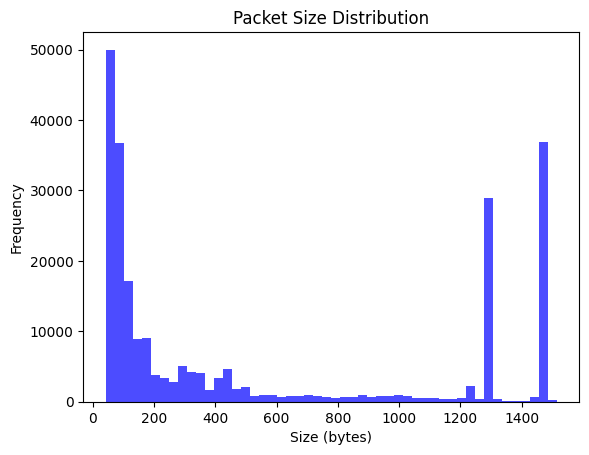

In [8]:
# parser = argparse.ArgumentParser(description="Analyze packets in a PCAP file")
# parser.add_argument("--pcap", required=True, help="Path to the pcap file")
# args = parser.parse_args()
analyze_packets("7.pcap")

In [9]:
from scapy.all import rdpcap, TCP

def find_matching_tcp_packets(pcap_file):
    try:
        # Read packets from the PCAP file
        # packets = rdpcap(pcap_file)

        print("Analyzing packets...")


        # print(*packets)
        for packet in packets:
            # Check if the packet has a TCP layer
            if packet.haslayer(TCP):
                tcp_layer = packet[TCP]

                # Extract flags
                flags = tcp_layer.flags
                ack_flag = flags & 0x10 != 0  # Check if ACK flag is set
                psh_flag = flags & 0x08 != 0  # Check if PSH flag is set    

                if ack_flag and psh_flag:
                    # Get source and destination port numbers
                    src_port = tcp_layer.sport
                    dst_port = tcp_layer.dport

                    # Check if the sum of source and destination ports equals 60303
                    if src_port + dst_port == 60303:
                        src_ip = packet["IP"].src
                        dst_ip = packet["IP"].dst

                        print(f"Match Found: Source IP: {src_ip}, Destination IP: {dst_ip}, Source Port: {src_port}, Destination Port: {dst_port}")

        print("Analysis complete.")

    except Exception as e:
        print(f"Error processing PCAP file: {e}")

# Specify the path to your PCAP file
pcap_file = '7.pcap'
find_matching_tcp_packets(pcap_file)


Analyzing packets...
Analysis complete.


In [20]:
from scapy.all import rdpcap, TCP

def find_matching_tcp_packets(pcap_file):
    try:
        # Read packets from the PCAP file
        # packets = rdpcap(pcap_file)

        print("Analyzing packets for ACK and PSH conditions...")

        count = 0
        for packet in packets:
            # Check if the packet has a TCP layer
            if packet.haslayer(TCP):
                tcp_layer = packet[TCP]

                # Extract flags
                flags = tcp_layer.flags
                syn_flag = (flags & 0x02 != 0)  # Check if SYN flag is set

                if syn_flag:
                    # Get source port and sequence number
                    src_port = tcp_layer.sport
                    seq_num = tcp_layer.seq

                    # Check conditions: Source Port divisible by 11 and Sequence Number > 100000
                    if src_port % 11 == 0 and seq_num > 100000:
                        src_ip = packet["IP"].src
                        dst_ip = packet["IP"].dst
                        print(f"SYN Match Found: Source IP: {src_ip}, Destination IP: {dst_ip}, Source Port: {src_port}, Sequence Number: {seq_num}")
                        count += 1

        print(f"Total number of SYN packets matching the criteria: {count}")

    except Exception as e:
        print(f"Error processing PCAP file: {e}")

# Specify the path to your PCAP file
pcap_file = '7.pcap'
find_matching_tcp_packets(pcap_file)


Analyzing packets for ACK and PSH conditions...
SYN Match Found: Source IP: 10.7.11.235, Destination IP: 10.240.8.31, Source Port: 53669, Sequence Number: 1135827499
SYN Match Found: Source IP: 10.7.11.235, Destination IP: 10.240.8.31, Source Port: 53669, Sequence Number: 1135827499
SYN Match Found: Source IP: 10.7.11.235, Destination IP: 10.240.8.31, Source Port: 53669, Sequence Number: 1135827499
SYN Match Found: Source IP: 10.7.11.235, Destination IP: 10.240.8.31, Source Port: 53669, Sequence Number: 1135827499
SYN Match Found: Source IP: 10.7.11.235, Destination IP: 3.111.224.186, Source Port: 53680, Sequence Number: 1843464350
SYN Match Found: Source IP: 10.7.11.235, Destination IP: 142.250.199.170, Source Port: 53691, Sequence Number: 3864593481
SYN Match Found: Source IP: 10.240.0.249, Destination IP: 10.0.136.7, Source Port: 55968, Sequence Number: 1634793694
SYN Match Found: Source IP: 10.240.0.249, Destination IP: 10.0.136.7, Source Port: 55979, Sequence Number: 1697408818
SY

In [11]:
from scapy.all import rdpcap, TCP
import sympy

def find_matching_tcp_packets(pcap_file):
    # try:
        # Read packets from the PCAP file
    # packets = rdpcap(pcap_file)

    print("Analyzing packets for specific IP and port conditions...")

    match_count = 0
    for packet in packets:
        # Check if the packet has a TCP layer
        if packet.haslayer(TCP):
            tcp_layer = packet[TCP]

            # Get source and destination ports
            src_port = tcp_layer.sport
            dst_port = tcp_layer.dport

            # Get source IP
            src_ip = packet["IP"].src

            # Check if the source IP matches the specified pattern
            if src_ip.startswith("18.234."):
                # Check if source port is a prime number and destination port is divisible by 11
                if sympy.isprime(src_port) and dst_port % 11 == 0:
                    dst_ip = packet["IP"].dst
                    print(f"Specific Match Found: Source IP: {src_ip}, Destination IP: {dst_ip}, Source Port: {src_port}, Destination Port: {dst_port}")
                    match_count += 1

    print(f"Total number of packets matching the specific IP and port criteria: {match_count}")

    # except Exception as e:
        # print(f"Error processing PCAP file: {e}")

# Specify the path to your PCAP file
pcap_file = '7.pcap'
find_matching_tcp_packets(pcap_file)


Analyzing packets for specific IP and port conditions...
Specific Match Found: Source IP: 18.234.0.179, Destination IP: 10.7.11.235, Source Port: 443, Destination Port: 53251
Specific Match Found: Source IP: 18.234.0.179, Destination IP: 10.7.11.235, Source Port: 443, Destination Port: 53251
Specific Match Found: Source IP: 18.234.0.179, Destination IP: 10.7.11.235, Source Port: 443, Destination Port: 53251
Specific Match Found: Source IP: 18.234.0.179, Destination IP: 10.7.11.235, Source Port: 443, Destination Port: 53251
Specific Match Found: Source IP: 18.234.0.179, Destination IP: 10.7.11.235, Source Port: 443, Destination Port: 53251
Specific Match Found: Source IP: 18.234.0.179, Destination IP: 10.7.11.235, Source Port: 443, Destination Port: 53251
Specific Match Found: Source IP: 18.234.0.179, Destination IP: 10.7.11.235, Source Port: 443, Destination Port: 53251
Specific Match Found: Source IP: 18.234.0.179, Destination IP: 10.7.11.235, Source Port: 443, Destination Port: 53251

In [12]:
from scapy.all import rdpcap, TCP
import sympy

def find_matching_tcp_packets(pcap_file):
    try:
        # Read packets from the PCAP file
        # packets = rdpcap(pcap_file)

        print("Analyzing packets for Sequence + Acknowledgment conditions...")

        for packet in packets:
            # Check if the packet has a TCP layer
            if packet.haslayer(TCP):
                tcp_layer = packet[TCP]

                # Get sequence and acknowledgment numbers
                seq_num = tcp_layer.seq
                ack_num = tcp_layer.ack

                # Check if the sum of sequence and acknowledgment numbers equals 2512800625
                if seq_num + ack_num == 2512800625:
                    checksum = tcp_layer.chksum

                    # Check if the checksum ends with 70 in hexadecimal
                    if hex(checksum).endswith("70"):
                        src_ip = packet["IP"].src
                        dst_ip = packet["IP"].dst
                        src_port = tcp_layer.sport
                        dst_port = tcp_layer.dport

                        print(f"Sequence + Acknowledgment Match Found: Source IP: {src_ip}, Destination IP: {dst_ip}, Source Port: {src_port}, Destination Port: {dst_port}, Sequence: {seq_num}, Acknowledgment: {ack_num}, Checksum: {hex(checksum)}")

    except Exception as e:
        print(f"Error processing PCAP file: {e}")

# Specify the path to your PCAP file
pcap_file = '7.pcap'
find_matching_tcp_packets(pcap_file)


Analyzing packets for Sequence + Acknowledgment conditions...
Sequence + Acknowledgment Match Found: Source IP: 10.240.8.31, Destination IP: 10.7.11.235, Source Port: 8009, Destination Port: 53669, Sequence: 1376971233, Acknowledgment: 1135829392, Checksum: 0xe670


In [22]:
from scapy.all import rdpcap

def find_packet_serial_by_destination_ip(pcap_file, target_ip):
    try:
        # Read packets from the PCAP file
        packets = rdpcap(pcap_file)

        # Iterate through packets to find the matching destination IP
        for i, packet in enumerate(packets):
            if packet.haslayer("IP"):
                ip_layer = packet["IP"]
                if ip_layer.dst == target_ip:
                    print(f"Packet Serial Number: {i + 1}, Source IP: {ip_layer.src}, Destination IP: {ip_layer.dst}")
                    return i + 1

        print("No matching packet found with the specified destination IP.")
        return None

    except Exception as e:
        print(f"Error processing PCAP file: {e}")

# Specify the path to your PCAP file and the target IP
pcap_file = 'Canarabank_test.pcap'
target_ip = '103.122.53.3'
find_packet_serial_by_destination_ip(pcap_file, target_ip)


Packet Serial Number: 8727, Source IP: 10.7.14.68, Destination IP: 103.122.53.3


8727